In [3]:
import pandas as pd

data = {'x':  ['4', '8', '15','24','24'],
        'y':  ['4', '4', '8' , '4', '12']
        }

df = pd.DataFrame(data)

print (df)

    x   y
0   4   4
1   8   4
2  15   8
3  24   4
4  24  12


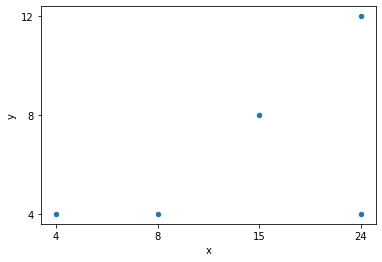

In [ ]:
df.plot(x='x', y='y', kind='scatter')	

In [ ]:
# def printPairs(arr, n):
#     pairs_point=[]
#     # Nested loop for all possible pairs
#     for i in range(n):
#         for j in range(n):
#             if i!=j:
#               point=[]
#               point.append(arr[i])
#               point.append(arr[j])
#               pairs_point.append(point)
#               #print("(",arr[i],",",arr[j],")",end=", ")
    
#     return pairs_point
           


# # Create a list in a range of 10-20
# pair_list = list(range(0, len(df)))

# # Print the list
# n = len(df)


# print(pair_list)

 
# a= printPairs(pair_list, n)
# print(len(a))

In [ ]:
import itertools

N = 5
numbers = list(range(N))

result = []
for i in range(2, N+1):
    result.extend(itertools.combinations(numbers, i))


result

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4),
 (0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 3, 4),
 (0, 2, 3, 4),
 (1, 2, 3, 4),
 (0, 1, 2, 3, 4)]

In [ ]:
first_cluster=result[:10]
first_cluster

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [ ]:
MSE_1 = []

for i in first_cluster:
  x1 = int(df['x'].loc[i[0]])
  x2 = int(df['x'].loc[i[1]])
  y1 = int(df['y'].loc[i[0]])
  y2 = int(df['y'].loc[i[1]])

  x = ( x1 + x2 )/2
  y = ( y1 + y2 )/2
  sqr_err = pow((x - x1),2) + pow((y - y1),2) +pow((x - x2),2) + pow((y- y2),2)
  MSE_1.append(sqr_err)
  print(sqr_err)
print('-'*20)
print('MIN MSE: ' , min(MSE_1))
index_min = min(range(len(MSE_1)), key=MSE_1.__getitem__)
print('INDEX MIN MSE: ', index_min)
print(first_cluster[index_min])
cluster_1 = first_cluster[index_min]

8.0
68.5
200.0
232.0
32.5
128.0
160.0
48.5
48.5
32.0
--------------------
MIN MSE:  8.0
INDEX MIN MSE:  0
(0, 1)


In [ ]:
import itertools

N = 5
numbers = list(range(2,N))

result = []
for i in range(1, N):
    result.extend(itertools.combinations(numbers, i))
new_cluster=[]

second_cluster = result[:6] 

for i in range(0, N): 
  if len(second_cluster[i])==1:
    new_cluster.append(cluster_1 + second_cluster[i])

print(new_cluster)

[(0, 1, 2), (0, 1, 3), (0, 1, 4)]


In [ ]:
# MSE = []

# for i in new_cluster:
#   x1 = int(df['x'].loc[i[0]])
#   x2 = int(df['x'].loc[i[1]])
#   x3 = int(df['x'].loc[i[2]])
#   y1 = int(df['y'].loc[i[0]])
#   y2 = int(df['y'].loc[i[1]])
#   y3 = int(df['y'].loc[i[2]])
#   x = ( x1 + x2 + x3)/3
#   y = ( y1 + y2 + y3)/3
#   print(x)
#   print(y)
#   sqr_err = pow((x - x1),2) + pow((y - y1),2) + pow((x - x2),2) + pow((y- y2),2) + pow((x - x3),2) + pow((y- y3),2) 
#   MSE.append(sqr_err)
# print(sqr_err)
# print('-'*20)
# print('MSE: ', MSE)
# print('MIN MSE: ' , min(MSE))
# index_min = min(range(len(MSE)), key=MSE.__getitem__)
# print('INDEX MIN MSE: ', index_min)
 # print(first_cluster[index_min])

9.0
5.333333333333333
12.0
4.0
12.0
6.666666666666667
266.6666666666667
--------------------
MSE:  [72.66666666666667, 224.0, 266.6666666666667]
MIN MSE:  72.66666666666667
INDEX MIN MSE:  0


In [7]:
result=result[:10]
result

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [15]:
print(result[0][0])

0
4


In [21]:
#N = 3
#numbers = list(range(N))
#numbers

def midPoint(arr, n ,df):
  sumx=0
  sumy=0
  x=0
  y=0
  l=len(arr)
  #print(l)
  for i in range(l):
    #print('ARRAY: ',arr[i])
    xi = int(df['x'].loc[arr[i]])
    yi = int(df['y'].loc[arr[i]])
    sumx = sumx + xi
    sumy = sumy + yi
  x = round( sumx / n, 2)
  y = round( sumy / n, 2)
   
  print('CLUSTER: [', arr ,'] ---> (', df.loc[arr[0]][0],',', df.loc[arr[0]][1], ')(', df.loc[arr[1]][0],',', df.loc[arr[1]][1], ') ---->  MIDPOINT: (',x,',',y,')')
 



for i in range(len(result)):
  points=result[i]
  n=len(result)
  midPoint(points,n,df)



CLUSTER: [ (0, 1) ] ---> ( 4 , 4 )( 8 , 4 ) ---->  MIDPOINT: ( 1.2 , 0.8 )
CLUSTER: [ (0, 2) ] ---> ( 4 , 4 )( 15 , 8 ) ---->  MIDPOINT: ( 1.9 , 1.2 )
CLUSTER: [ (0, 3) ] ---> ( 4 , 4 )( 24 , 4 ) ---->  MIDPOINT: ( 2.8 , 0.8 )
CLUSTER: [ (0, 4) ] ---> ( 4 , 4 )( 24 , 12 ) ---->  MIDPOINT: ( 2.8 , 1.6 )
CLUSTER: [ (1, 2) ] ---> ( 8 , 4 )( 15 , 8 ) ---->  MIDPOINT: ( 2.3 , 1.2 )
CLUSTER: [ (1, 3) ] ---> ( 8 , 4 )( 24 , 4 ) ---->  MIDPOINT: ( 3.2 , 0.8 )
CLUSTER: [ (1, 4) ] ---> ( 8 , 4 )( 24 , 12 ) ---->  MIDPOINT: ( 3.2 , 1.6 )
CLUSTER: [ (2, 3) ] ---> ( 15 , 8 )( 24 , 4 ) ---->  MIDPOINT: ( 3.9 , 1.2 )
CLUSTER: [ (2, 4) ] ---> ( 15 , 8 )( 24 , 12 ) ---->  MIDPOINT: ( 3.9 , 2.0 )
CLUSTER: [ (3, 4) ] ---> ( 24 , 4 )( 24 , 12 ) ---->  MIDPOINT: ( 4.8 , 1.6 )
